<a href="https://colab.research.google.com/github/SadbinShakil/Predict-Brain-Tumor-Using-MRI-Images--Deep-Learning/blob/main/Brain_Tumor_Detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
#get the dataset from Dropbox
!wget https://www.dropbox.com/s/513jpmk94rtp1yy/BrainTumorDatasetV2.zip?dl=0

--2023-02-01 04:20:21--  https://www.dropbox.com/s/513jpmk94rtp1yy/BrainTumorDatasetV2.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.64.18, 2620:100:601a:18::a27d:712
Connecting to www.dropbox.com (www.dropbox.com)|162.125.64.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/513jpmk94rtp1yy/BrainTumorDatasetV2.zip [following]
--2023-02-01 04:20:23--  https://www.dropbox.com/s/raw/513jpmk94rtp1yy/BrainTumorDatasetV2.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucdf46cf14e2c1e90240b376ab67.dl.dropboxusercontent.com/cd/0/inline/B1rLgIq2rc9m8HePXk1e5eonVM1A67CnHFliX5XDXKKa0AHhTsjsCDniHWkz44V6eatvLow5FiGA7xRoG3odNCTlwogRDP4YlNF1L8LaWFnhzK4p2EQ_vSy6T409Bwjwt-3M3hpdIga-Rl8ufWgnCLK49bCo4l-v_GtrLLBik6dfdA/file# [following]
--2023-02-01 04:20:24--  https://ucdf46cf14e2c1e90240b376ab67.dl.dropboxusercontent.com/cd/0/inline/B1rLgIq2rc9m8HePXk1e5eonVM1A67CnHFliX5XD

In [51]:
# unzip the data
!unzip /content/BrainTumorDatasetV2.zip?dl=0.1

Streaming output truncated to the last 5000 lines.
  inflating: BrainTumorDataset/Tumor/m3 (49).jpg  
  inflating: BrainTumorDataset/Tumor/m3 (5).jpg  
  inflating: BrainTumorDataset/Tumor/m3 (50).jpg  
  inflating: BrainTumorDataset/Tumor/m3 (51).jpg  
  inflating: BrainTumorDataset/Tumor/m3 (52).jpg  
  inflating: BrainTumorDataset/Tumor/m3 (53).jpg  
  inflating: BrainTumorDataset/Tumor/m3 (54).jpg  
  inflating: BrainTumorDataset/Tumor/m3 (55).jpg  
  inflating: BrainTumorDataset/Tumor/m3 (56).jpg  
  inflating: BrainTumorDataset/Tumor/m3 (57).jpg  
  inflating: BrainTumorDataset/Tumor/m3 (58).jpg  
  inflating: BrainTumorDataset/Tumor/m3 (59).jpg  
  inflating: BrainTumorDataset/Tumor/m3 (6).jpg  
  inflating: BrainTumorDataset/Tumor/m3 (60).jpg  
  inflating: BrainTumorDataset/Tumor/m3 (61).jpg  
  inflating: BrainTumorDataset/Tumor/m3 (62).jpg  
  inflating: BrainTumorDataset/Tumor/m3 (63).jpg  
  inflating: BrainTumorDataset/Tumor/m3 (64).jpg  
  inflating: BrainTumorDataset/Tu

In [36]:
# Importing required libraries and packages 
import numpy as np
import matplotlib.pyplot as plt
import glob
import os 
import shutil
import math

In [52]:
# count the number of images in the respective classes 

ROOT_DIR = "/content/BrainTumorDataset"

num_of_images = {}

#os.listdir gives me the list of items and if i use len func then i will get the whole length of that list

for dir in os.listdir(ROOT_DIR):
  num_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

print(num_of_images)


{'Healthy': 1991, 'Tumor': 6707}


we will split our data such that we have
* 70% for Train Data 
* 15% for Validation 
* 15% for Testing 

In [ ]:
# we create a training folder 

# if not os.path.exists("./Train"):
#   os.mkdir("./Train")

#   for dir in os.listdir(ROOT_DIR):
#     os.makedirs("./Train/"+dir)
#     for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir) ) , 
#                                 size= (math.floor(80/100*num_of_images[dir])-5) , replace=False ):
      
#       O = os.path.join(ROOT_DIR,dir,img) #path
#       D = os.path.join('./Train', dir)
#       shutil.copy(O,D)
#       os.remove(O)
# else:
#   print("Train Folder exsist")

In [ ]:
# we create a Validation folder 

# if not os.path.exists("./Val"):
#   os.mkdir("./Val")

#   for dir in os.listdir(ROOT_DIR):
#     os.makedirs("./Val/"+dir)
#     for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir) ) , 
#                                 size= (math.floor(10/100*num_of_images[dir])-2) , replace=False ):
      
#       O = os.path.join(ROOT_DIR,dir,img)
#       D = os.path.join('./Val', dir)
#       shutil.copy(O,D)
#       os.remove(O)
# else:
#   print("Validation Folder exsist")

In [ ]:

# we create a test folder 

# if not os.path.exists("./Test"):
#   os.mkdir("./Test")

#   for dir in os.listdir(ROOT_DIR):
#     os.makedirs("./Test/"+dir)
#     for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir) ) , 
#                                 size= (math.floor(10/100*num_of_images[dir])-2) , replace=False ):
      
#       O = os.path.join(ROOT_DIR,dir,img)
#       D = os.path.join('./Test', dir)
#       shutil.copy(O,D)
#       os.remove(O)
# else:
#   print("Test Folder exsist")

In [53]:
# we create a folder using function 
def dataFolder(path, split):
  if not os.path.exists("./"+path):
    os.mkdir("./"+path)

    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./"+path+"/"+dir)
      for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir) ) , 
                                  size= (math.floor(split*num_of_images[dir])-5) , replace=False ):
        
        O = os.path.join(ROOT_DIR,dir,img)
        D = os.path.join("./"+path,dir)
        shutil.copy(O,D)
        os.remove(O)
  else:
    print(f"{path} Folder exsist")

In [49]:
# #Delete folder

# !rm -rf Train

In [54]:
dataFolder("Train", 0.7)

In [58]:
dataFolder("Val", 0.15)

In [56]:
dataFolder("Test", 0.15)

In [59]:
# Checking whether successfully split the data into diff folders
num_of_images = {}

#os.listdir gives me the list of items and if i use len func then i will get the whole length of that list

for dir in os.listdir(ROOT_DIR):
  num_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

print(num_of_images)

{'Healthy': 17, 'Tumor': 16}


## WE have now sucessfully devided our data
# Lets now build our model

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense,Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization, MaxPooling2D, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing import image
# from keras.preprocessing.image import load_img, img_to_array
from keras_preprocessing.image import img_to_array, load_img, ImageDataGenerator
import keras
import tensorflow as tf

In [61]:
# CNN model 

model = Sequential() 
model.add(Conv2D(filters=16, kernel_size= (3,3), activation= 'relu', input_shape=(224,224,3)) )

model.add(Conv2D(filters=36, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2))) ##in order to ignore overfitting


model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))

model.add(Dense(units=1, activation='sigmoid'))
model.summary()
     

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 36)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [62]:
model.compile(loss= tf.keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'] )

## Preparing our data using data generator

In [63]:
train_datagen = image.ImageDataGenerator(
     zoom_range = 0.2, shear_range = 0.2 , rescale = 1/255 , horizontal_flip=True
)

val_datagen = image.ImageDataGenerator(rescale = 1/255)

test_datagen = image.ImageDataGenerator(rescale = 1/255)

In [64]:
#doing the same thing with func for training data
def preprocessing_Img(path):
  """
  input : path
  output: pre processed image
  """
  image_data = ImageDataGenerator(zoom_range = 0.2, shear_range = 0.2 , rescale = 1/255 , horizontal_flip=True)
  image = image_data.flow_from_directory(directory= path, target_size=(224,224), batch_size=32, class_mode = 'binary')

  return image

In [65]:
#doing the same thing with func for validation and test data
def preprocessing_Img2(path):
  """
  input : path
  output: pre processed image
  """
  # data augmentation
  image_data = ImageDataGenerator(rescale = 1/255)
  image = image_data.flow_from_directory(directory= path, target_size=(224,224), batch_size=32, class_mode = 'binary')

  return image

In [66]:
path = "/content/Train"
train_data = preprocessing_Img(path)

Found 6077 images belonging to 2 classes.


In [67]:
path = "/content/Val"
val_data = preprocessing_Img2(path)

Found 1294 images belonging to 2 classes.


In [68]:
path = "/content/Test"
test_data = preprocessing_Img2(path)

Found 1294 images belonging to 2 classes.


In [ ]:
# train_data = train_datagen.flow_from_directory(directory= "/content/Train", target_size=(224,224), batch_size=32,
#                                   class_mode = 'binary', 
#                                   )


     

Found 2079 images belonging to 2 classes.


In [ ]:
train_data.class_indices

{'Healthy': 0, 'Tumor': 1}

In [ ]:
test_data.class_indices

{'Healthy': 0, 'Tumor': 1}

In [ ]:
val_data.class_indices

{'Healthy': 0, 'Tumor': 1}

In [ ]:
# val_data = val_datagen.flow_from_directory(directory= "/content/Val", target_size=(224,224), batch_size=32,
#                                   class_mode = 'binary'
#                                   )
     

Found 437 images belonging to 2 classes.


In [ ]:
# test_data = test_datagen.flow_from_directory(directory= "/content/Test", target_size=(224,224), batch_size=32,
#                                   class_mode = 'binary'
#                                   )

Found 437 images belonging to 2 classes.


In [106]:
## having early stopping and model check point 
from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0 , patience= 10, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="./best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [107]:
hist = model.fit_generator(generator=train_data, 
                              steps_per_epoch= 8 , 
                              epochs= 300 ,
                              verbose= 1, 
                              validation_data= val_data , 
                              validation_steps= 16,
                              callbacks = call_back
                               )


<ipython-input-107-0c588cdaa76a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(generator=train_data,


Epoch 1/300
8/8 [==============================] - ETA: 0s - loss: 0.2208 - accuracy: 0.9219
Epoch 1: val_accuracy improved from -inf to 0.93555, saving model to ./best_model.h5
8/8 [==============================] - 6s 731ms/step - loss: 0.2208 - accuracy: 0.9219 - val_loss: 0.1580 - val_accuracy: 0.9355
Epoch 2/300
8/8 [==============================] - ETA: 0s - loss: 0.2160 - accuracy: 0.9141
Epoch 2: val_accuracy did not improve from 0.93555
8/8 [==============================] - 5s 692ms/step - loss: 0.2160 - accuracy: 0.9141 - val_loss: 0.1658 - val_accuracy: 0.9336
Epoch 3/300
8/8 [==============================] - ETA: 0s - loss: 0.1898 - accuracy: 0.9180
Epoch 3: val_accuracy improved from 0.93555 to 0.94336, saving model to ./best_model.h5
8/8 [==============================] - 5s 693ms/step - loss: 0.1898 - accuracy: 0.9180 - val_loss: 0.1790 - val_accuracy: 0.9434
Epoch 4/300
8/8 [==============================] - ETA: 0s - loss: 0.2418 - accuracy: 0.9102
Epoch 4: val_accu

## Model Accuracy

In [108]:
from keras.models import load_model

model = load_model("/content/best_model.h5")

In [109]:
# checking out the accuracy of our model 
acc = model.evaluate_generator(generator= test_data)[1] 

print(f"The accuracy of your model is = {acc*100}%")

<ipython-input-109-d15e53cece43>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(generator= test_data)[1]


The accuracy of your model is = 94.89953517913818%


In [110]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

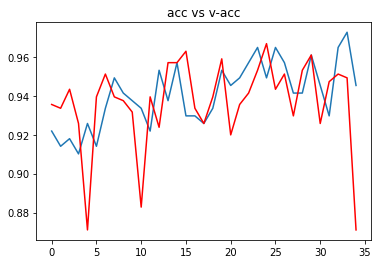

In [111]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

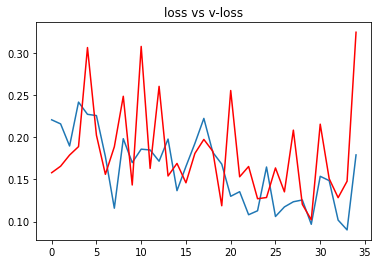

In [112]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()
     

In [113]:
from keras.utils import load_img, img_to_array
from tensorflow.keras.utils import img_to_array
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [123]:
# path for the image to see if it predics correct class

path = "/content/Val/Tumor/Tr-glTr_0006.jpg"


img = load_img(path, target_size=(224,224))
input_arr = img_to_array(img)/255

input_arr.shape

input_arr = np.expand_dims(input_arr, axis = 0)
# pred = model.predict(input_arr)

pred = model.predict(input_arr) 
# print('the prediction is: ')
print(np.round(pred))
# print(pred.shape)
# y_classes = pred.argmax(axis=-1)

print(f"Probability is {pred}")
# print(f"class is {y_classes}")


if np.round(pred) == 0:
  print("The MRI image is of Healthey brain")
else:
  print("The MRI image is of BRAIN TUMOR")

1/1 [==============================] - 0s 15ms/step
[[1.]]
Probability is [[0.9959305]]
The MRI image is of BRAIN TUMOR


In [ ]:
train_data.class_indices

{'Healthy': 0, 'Tumor': 1}

In [13]:
#Delete folder

!rm -rf Train

In [115]:
from keras.utils import load_img, img_to_array
from tensorflow.keras.utils import img_to_array
import tensorflow as tf

In [116]:
def checking_correction_count(path):

  path = path

  img = load_img(path, target_size=(224,224))
  input_arr = img_to_array(img)/255

  input_arr.shape

  input_arr = np.expand_dims(input_arr, axis = 0)
  pred = model.predict(input_arr) 
  y_classes = pred.argmax(axis=-1)

  print(f"Probability of my class being healthy is {pred}")
  print(f"class is {y_classes}")
  return pred


  # img = load_img(path, target_size=(224,224))
  # input_arr = img_to_array(img)/255

  # input_arr.shape

  # input_arr = np.expand_dims(input_arr, axis = 0)
  # pred = model.predict(input_arr)




 

  

In [117]:
#Storing all the paths of healthy and tumorious images

def get_path(input_folder):
    retval = []
    for file in os.listdir(input_folder):
        if file.endswith(".jpg"):
            retval.append(os.path.join(input_folder, file))
    return retval

In [118]:
healthy_paths = []
path = "/content/Val/Healthy"
healthy_paths = get_path(path)

In [119]:
Tumor_paths = []
path = "/content/Val/Tumor"
Tumor_paths = get_path(path)

In [ ]:
healthy_count = 0
tumor_count   = 0
for path in healthy_paths:
  pred = checking_correction_count(path)


  # print(f"Path is {path}")
  # print(f"Probability of my class being healthy is {pred}")

  if np.round(pred) == 0:
    print("The MRI image is of Healthey brain")
    healthy_count = healthy_count + 1
  else:
    print("The MRI image is of BRAIN TUMOR")
    tumor_count = tumor_count + 1


print(f"Healthy count is: {healthy_count}, Tumor Count is: {tumor_count}")

In [ ]:
healthy_count = 0
tumor_count   = 0
for path in Tumor_paths:
  pred = checking_correction_count(path)


  # print(f"Path is {path}")
  # print(f"Probability of my class being healthy is {pred}")

  if np.round(pred) == 0:
    print("The MRI image is of Healthey brain")
    healthy_count = healthy_count + 1
  else:
    print("The MRI image is of BRAIN TUMOR")
    tumor_count = tumor_count + 1


print(f"Healthy count is: {healthy_count}, Tumor Count is: {tumor_count}")